In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv.imread("glasscelling.jpg")
cv.imshow('img',img)
cv.waitKey(0)

255

In [8]:
cameraMatrix= np.zeros((3,3))
cameraMatrix[0][0] = 760.906
cameraMatrix[1][1] = 760.906
cameraMatrix[0][2] = 626.164
cameraMatrix[1][2] = 368.235 
cameraMatrix[2][2] = 1
distCoeffs = np.array([0.0915489, -0.23991, 0, 0, 0.111233]) 
dst = cv.undistort(img, cameraMatrix, distCoeffs)

In [9]:
cv.imshow('img',img)
cv.imshow('dst',dst)
cv.waitKey(0)

255

In [10]:
def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y

In [15]:
cv.namedWindow('mouseCallBack')
cv.setMouseCallback('mouseCallBack', draw_circle)

In [19]:
from time import time
boxes = []
def on_mouse(event, x, y, flags, params):
    # global img
    t = time()

    if event == cv.EVENT_LBUTTONDOWN:
        print('Start Mouse Position: '+str(x)+', '+str(y))
        sbox = (x, y)
        boxes.append(sbox)
    elif event == cv.EVENT_LBUTTONUP:
        print('End Mouse Position: '+str(x)+', '+str(y))
        ebox = (x, y)
        boxes.append(ebox)
        thickness = 1 
        lineType = 4
        point_color = (0, 255, 0)
        cv.line(dst, boxes[-2], boxes[-1], point_color, thickness, lineType)

count = 0
while(1):
    cv.namedWindow('real image')
    cv.setMouseCallback('real image', on_mouse, 0)
    cv.imshow('real image', dst)
    cv.waitKey (10000) # 显示 10000 ms 即 10s 后消失
    cv.destroyAllWindows()

Start Mouse Position: 774, 346
End Mouse Position: 940, 373
Start Mouse Position: 417, 426
End Mouse Position: 573, 450
Start Mouse Position: 626, 368
End Mouse Position: 874, 492
Start Mouse Position: 4, 480
End Mouse Position: 1173, 642
Start Mouse Position: 2, 578
End Mouse Position: 532, 642
Start Mouse Position: 643, 135
End Mouse Position: 1198, 247
Start Mouse Position: 1278, 540
End Mouse Position: 1005, 614
Start Mouse Position: 3, 213
End Mouse Position: 420, 282
Start Mouse Position: 1, 10
End Mouse Position: 631, 140
Start Mouse Position: 1127, 8
End Mouse Position: 760, 715
Start Mouse Position: 670, 6
End Mouse Position: 522, 710


KeyboardInterrupt: 

In [88]:
import numpy as np
import copy as cp
from scipy.spatial.transform import Rotation as Rot

###
# Generate an articial 3D rectangle of specific dimentions in front of the camera, 
#parallel to the image plane, as a set of 3D points expressed in homogeneous coordinates
#(therefore, each point is 4-dimensional). Their coordinates are expressed 
#in the coordinate frame of the camera (which coincides with the world)

z = 0.3
rec_dim = 0.1
npts = 1000

rectangle = []
rectangle += [[-rec_dim/2 + (rec_dim*i)/npts, -rec_dim/2, z, 1.] for i in range(0, npts)] # Append upper edge
rectangle += [[rec_dim/2, -rec_dim/2 + (rec_dim*i)/npts, z, 1.] for i in range(0, npts)] # Append right rectangle
rectangle += [[rec_dim/2 - (rec_dim*i)/npts, rec_dim/2, z, 1.] for i in range(0, npts)] # Append lower edge
rectangle += [[-rec_dim/2, rec_dim/2 - (rec_dim*i)/npts, z, 1.] for i in range(0, npts)] # Append left edge
rectangle = np.array(rectangle).T # Change to numpy.array type and transpose
###

###
# Generate an artificial 3D cube as 6 faces of the 3D rectangle
new_face = cp.deepcopy(rectangle)
new_face[2, :] += rec_dim
half_cube = np.concatenate((rectangle, new_face), axis=1)
half_cube[2, :] -= z

half_cube_1 = cp.deepcopy(half_cube) # This should store the front and back face

half_cube[2, :] -= (rec_dim/2) # Translating to the center of origin in order to apply rotation around the centroid of the points

r = Rot.from_euler('xyz', [0.0, np.pi/2, 0]) # Specify the desired rotation as a sequence of 3 Euler angles
rot_matrix = r.as_dcm() # Obtain the corresponding 3x3 rotation matrix
hom_rot_matrix = np.eye(4)
hom_rot_matrix[:3, :3] = rot_matrix

half_cube_2 = np.matmul(hom_rot_matrix, half_cube) # Apply rotation
half_cube_2[2, :] += (rec_dim/2) # Restore points to their original translation. This should store the left and right cube faces

cube = np.concatenate((half_cube_1, half_cube_2), axis=1)
###

/homes/n17zan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `as_dcm` is deprecated!
as_dcm is renamed to as_matrix in scipy 1.4.0 and will be removed in scipy 1.6.0


In [100]:
affineMatrix = np.concatenate((cameraMatrix, np.zeros((3,1))), axis = 1)
coordinate_2D = np.dot(affineMatrix,rectangle)

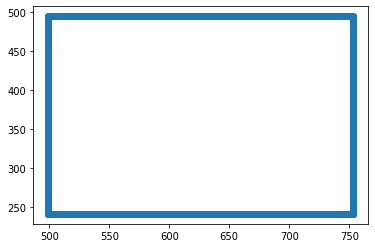

In [95]:
coordinate_2D_Nor = coordinate_2D/coordinate_2D[-1,:]
plt.scatter(coordinate_2D_Nor[0,:],coordinate_2D_Nor[1,:])

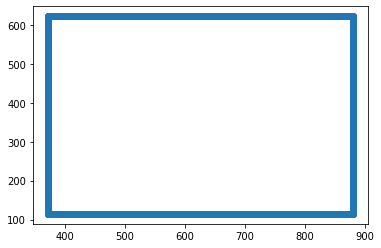

In [109]:
affineMatrix_double = np.copy(affineMatrix)
affineMatrix_double[0][0]*=2
affineMatrix_double[1][1]*=2
coordinate_2D_double = np.dot(affineMatrix_double,rectangle)
coordinate_2D_Nor_double = coordinate_2D_double/coordinate_2D_double[-1,:]
plt.scatter(coordinate_2D_Nor_double[0,:],coordinate_2D_Nor_double[1,:])

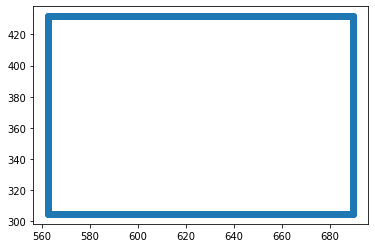

In [110]:
affineMatrix_half = np.copy(affineMatrix)
affineMatrix_half[0][0]/=2
affineMatrix_half[1][1]/=2
coordinate_2D_half = np.dot(affineMatrix_half,rectangle)
coordinate_2D_Nor_half = coordinate_2D_half/coordinate_2D_half[-1,:]
plt.scatter(coordinate_2D_Nor_half[0,:],coordinate_2D_Nor_half[1,:])

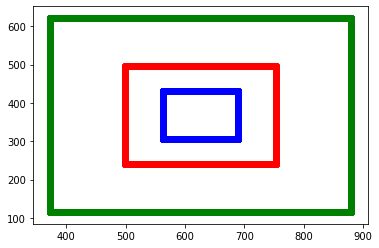

In [112]:
plt.scatter(coordinate_2D_Nor[0,:],coordinate_2D_Nor[1,:], c='r')
plt.scatter(coordinate_2D_Nor_double[0,:],coordinate_2D_Nor_double[1,:], c='g')
plt.scatter(coordinate_2D_Nor_half[0,:],coordinate_2D_Nor_half[1,:], c='b')

In [117]:
CTW = np.array([[0.92387953,0.,0.38268343,
0],[0.,1.,0.,0],[-0.38268343,0.,0.92387953,-0.2]])

In [122]:
intervariable = np.dot(CTW, cube)
result = np.dot(cameraMatrix, intervariable)
result/=result[-1,:]

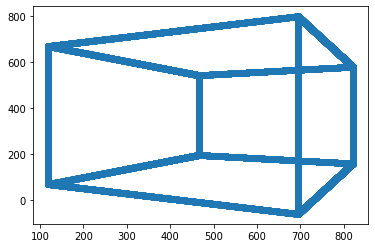

In [123]:
plt.scatter(result[0,:], result[1,:])